# Change point detection

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

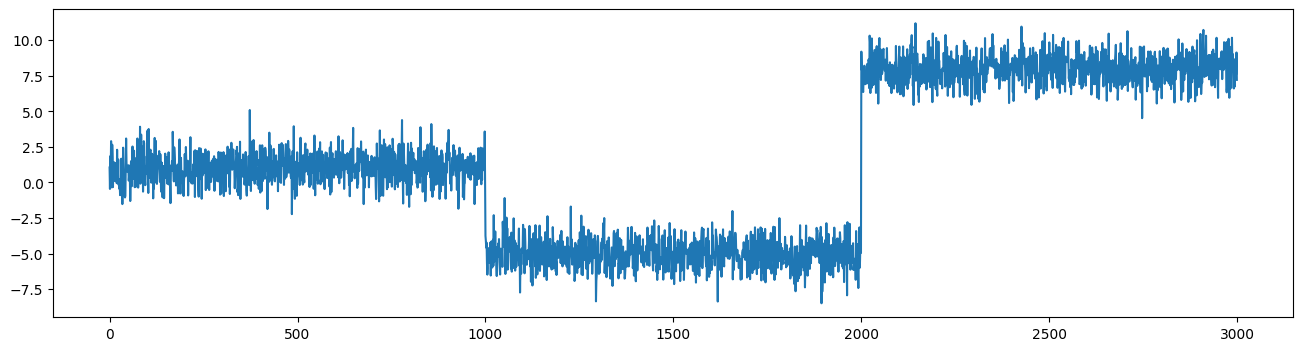

In [39]:
# Example 0: contant variance
ts1 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(3):
    ts = np.random.normal(mu, sigma, seg) + np.random.randint(low=-10, high=10)
    ts1 = np.append(ts1,ts, axis=0)

plt.figure(figsize=(16,4))
plt.plot(ts1)


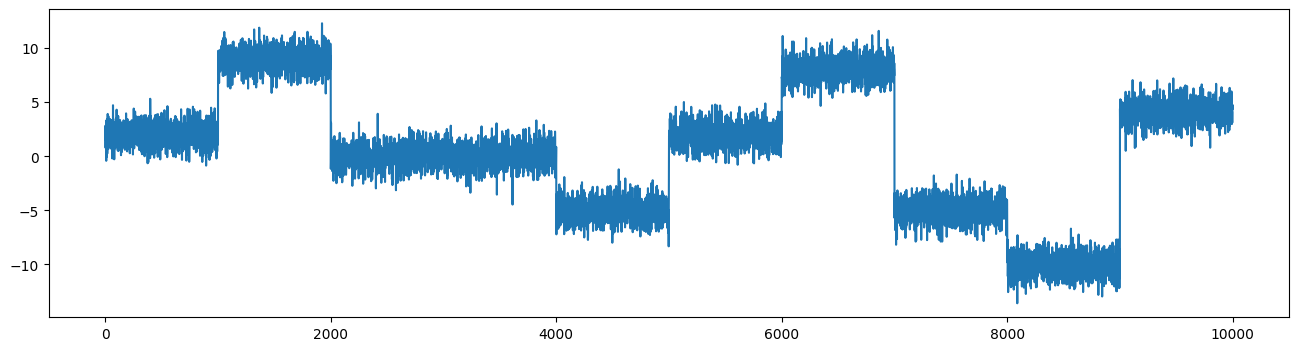

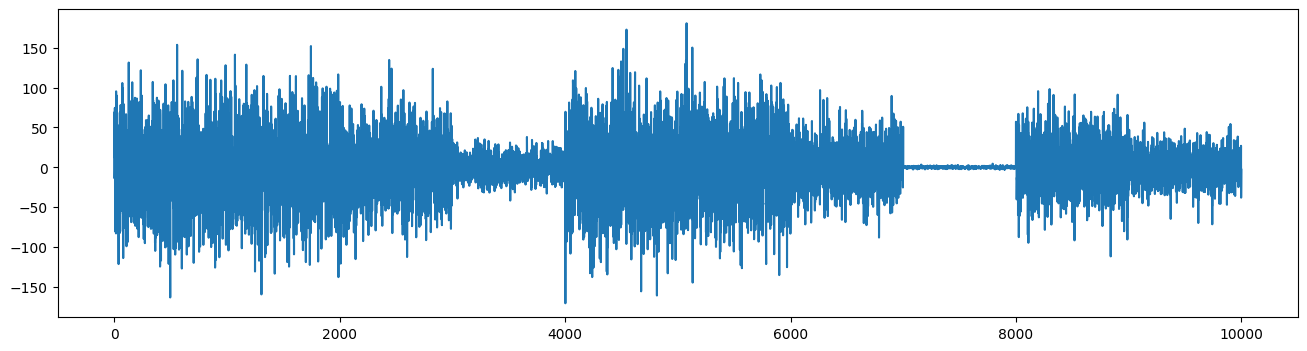

In [28]:
# Example 1: contant variance
ts1 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    ts = np.random.normal(mu, sigma, seg) + np.random.randint(low=-10, high=10)
    ts1 = np.append(ts1,ts, axis=0)

plt.figure(figsize=(16,4))
plt.plot(ts1)

# Example 2: varying variance
ts2 = []
mu, sigma, seg = 0.0, 1.0, 1000
for i in range(10):
    sig = np.random.randint(low=1, high=50)
    ts = np.random.normal(mu, sigma * sig, seg) 
    ts2 = np.append(ts2,ts, axis=0)
    
plt.figure(figsize=(16,4))
plt.plot(ts2)

### Offline

In [29]:
#!pip install ruptures

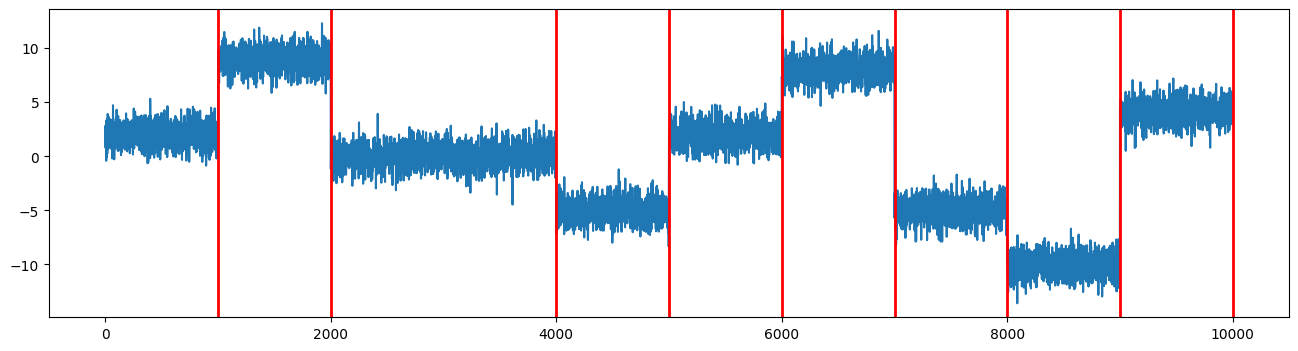

In [30]:
# !pip install ruptures
import ruptures as rpt

# Detect the change points
algo1 = rpt.Pelt(model="rbf").fit(ts1)
change_location1 = algo1.predict(pen=10)

# Point the change points:
def plot_change_points(ts,ts_change_loc):
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x,lw=2, color='red')

plot_change_points(ts1,change_location1)

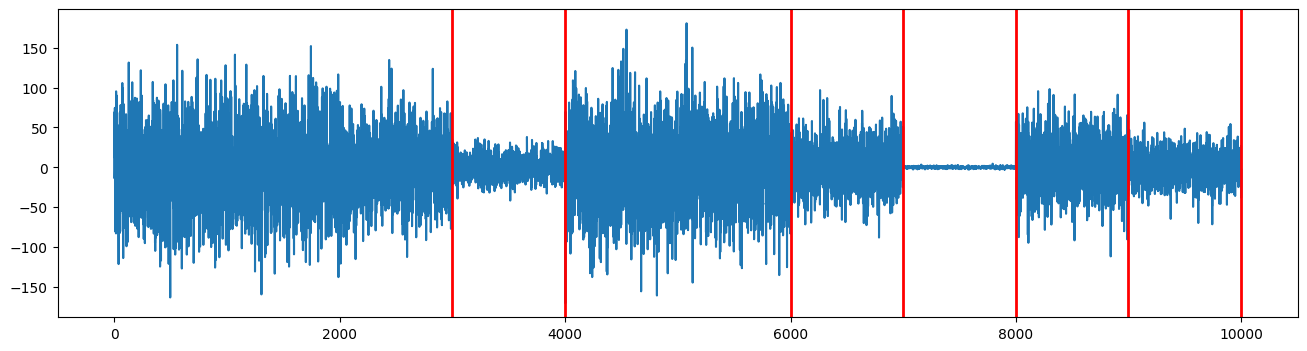

In [31]:
# detect the change points #
algo2 = rpt.Pelt(model="rbf").fit(ts2)
change_location2 = algo2.predict(pen=10)
change_location2

# Plot the change points #
plot_change_points(ts2,change_location2)

In [40]:
change_location2

[3000, 4000, 6005, 7000, 8000, 8995, 10000]

### Real-time

In [32]:
#pip install changefinder

Note: you may need to restart the kernel to use updated packages.


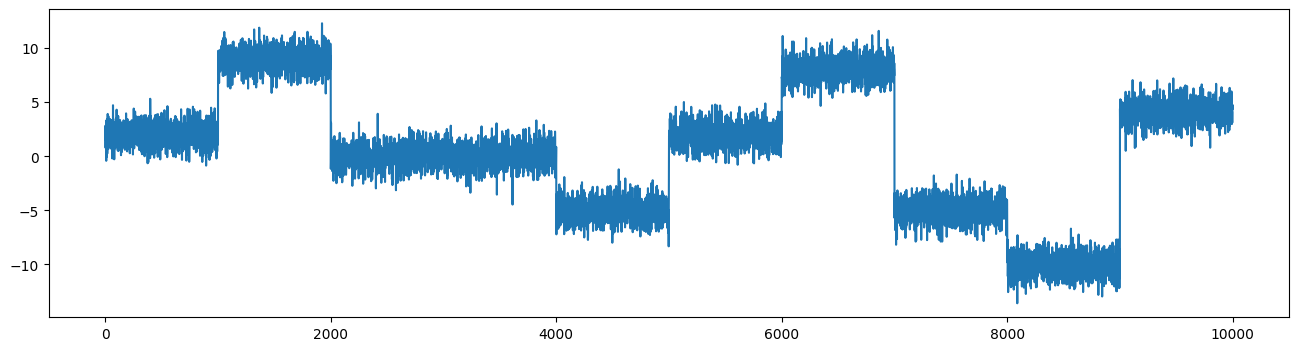

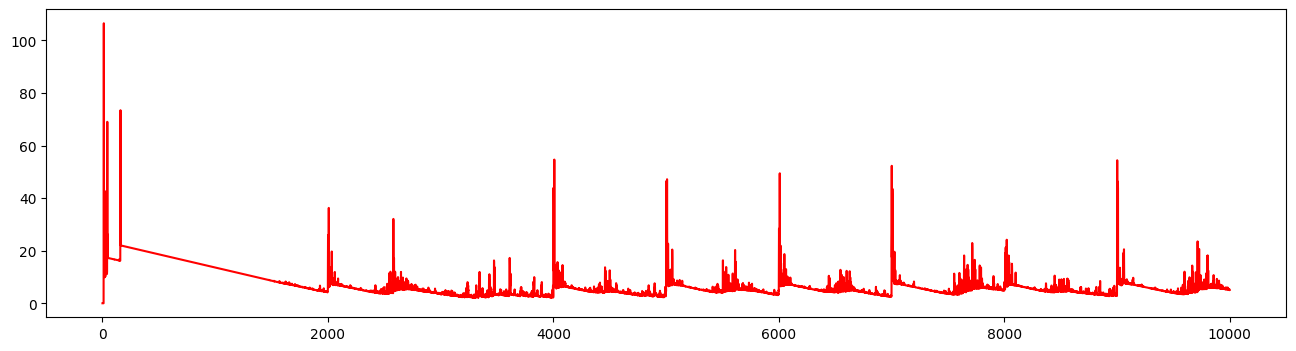

In [33]:
# !pip install changefinder
import changefinder

def findChangePoints(ts, r, order, smooth):
    '''
       r: Discounting rate
       order: AR model order
       smooth: smoothing window size T
    '''
    cf = changefinder.ChangeFinder(r=r, order=order, smooth=smooth)
    ts_score = [cf.update(p) for p in ts]
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    plt.figure(figsize=(16,4))
    plt.plot(ts_score, color='red')
    return(ts_score)
    
ts_score1 = findChangePoints(ts1, r = 0.01, order = 3, smooth = 5)

In [41]:
ts_change_loc1 = pd.Series(ts_score1).nlargest(20)
ts_change_loc1 = ts_change_loc1.index
np.sort(ts_change_loc1)

array([  11,   12,   13,   42,   43,  159,  160, 4001, 4008, 5001, 5007,
       5008, 6007, 6008, 7000, 7001, 9000, 9001, 9007, 9008])

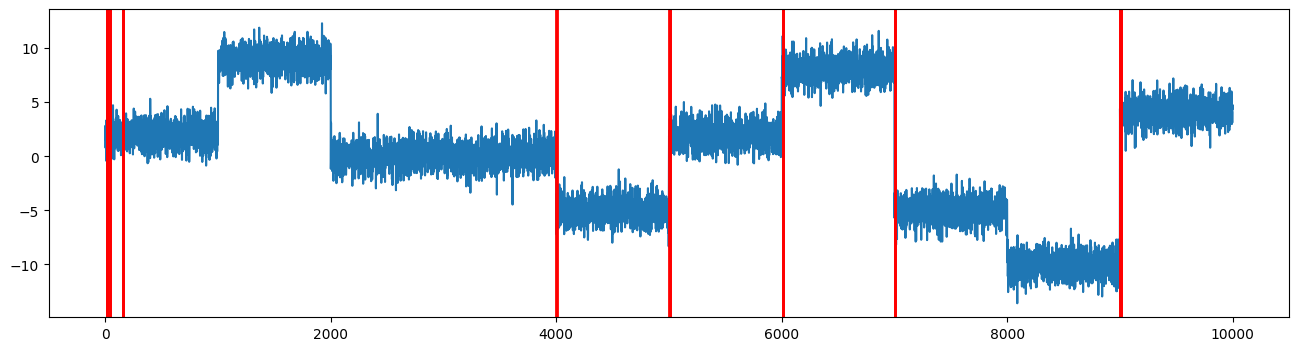

In [35]:
def plot_change_points(ts,ts_change_loc):
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x,lw=2, color='red')
        
plot_change_points(ts1,ts_change_loc1)

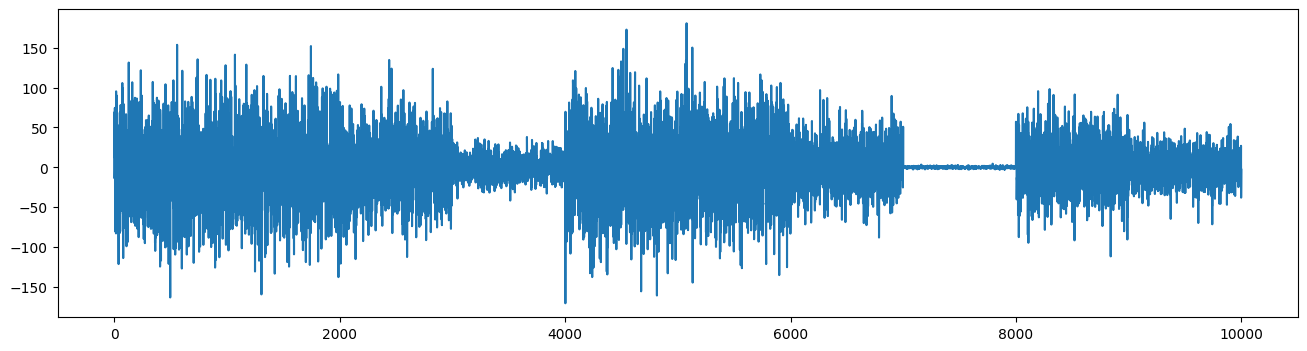

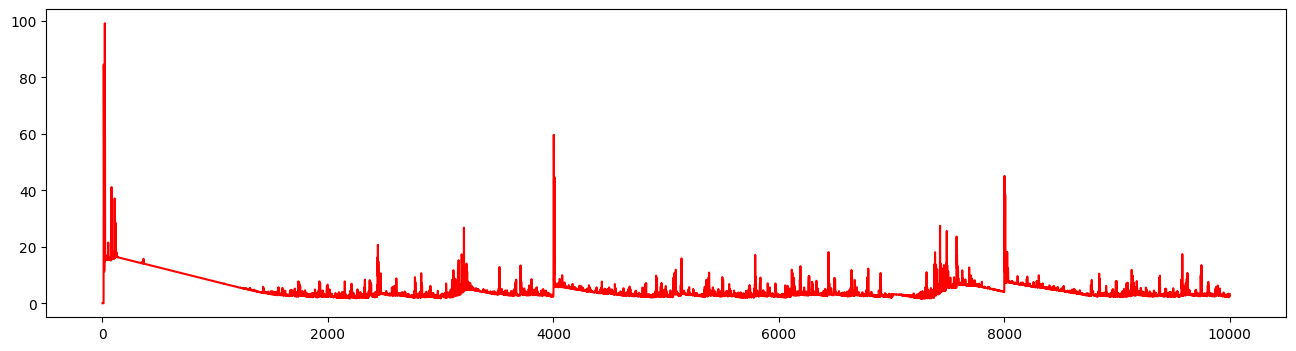

In [36]:
ts_score2 = findChangePoints(ts2, r = 0.01, order = 3, smooth = 5)

In [42]:
ts_change_loc2 = pd.Series(ts_score2).nlargest(20)
ts_change_loc2 = ts_change_loc2.index
np.sort(ts_change_loc2)

array([  11,   12,   13,   19,   20,   21,   22,   80,   81,  107,  108,
        117, 4003, 4004, 4010, 4011, 8000, 8001, 8007, 8008])

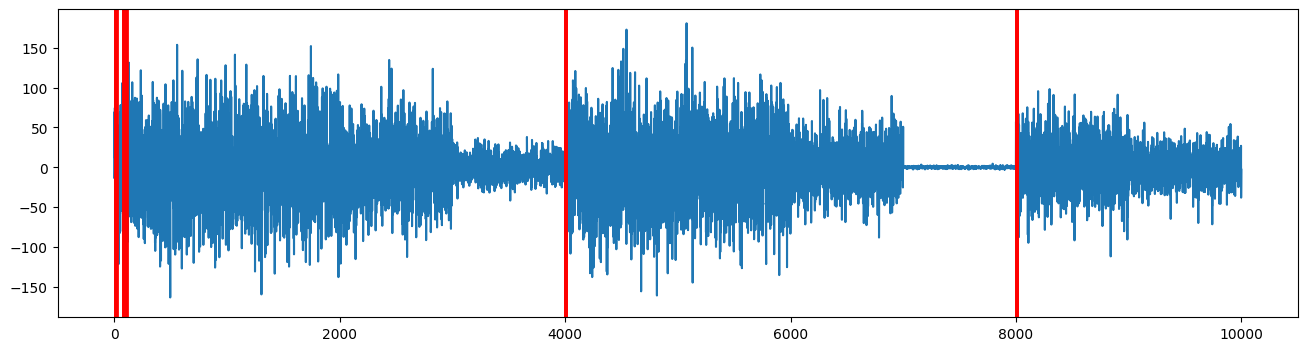

In [43]:
plot_change_points(ts2,ts_change_loc2)